In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
df=pd.read_csv(r'C:\Users\AYUSHI\Desktop\Flip Robo\Data Trained Projects\titanic_train.csv')

In [3]:
print (df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
df['Age']=df['Age'].replace('',np.nan)

In [14]:
df['Age']=df['Age'].astype(float)

In [28]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
df['Embarked']=df['Embarked'].replace('',np.nan)

In [36]:
df['Embarked']=df['Embarked'].fillna("S")

In [18]:
df['Age']=df['Age'].fillna(np.mean(df["Age"]))

In [37]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Since Cabin is a unique value column, we cannot replace it with any statistical value. Thus dropping cabin and as passenger ID, Name,Ticket,Fare,Parch and Pclass are of no significance to survival thus dropping them too.

In [54]:
titanic1=df.drop("Cabin",axis=1)
titanic2=titanic1.drop("PassengerId",axis=1)
titanic3=titanic2.drop("Name",axis=1)
titanic4=titanic3.drop("Ticket",axis=1)
titanic5=titanic4.drop("Fare",axis=1)
titanic6=titanic5.drop("Pclass",axis=1)
titanic=titanic6.drop("Parch",axis=1)

In [55]:
titanic

,Survived,Sex,Age,SibSp,Embarked
0,0,male,22.000000,1,S
1,1,female,38.000000,1,C
2,1,female,26.000000,0,S
3,1,female,35.000000,1,S
4,0,male,35.000000,0,S
...,...,...,...,...,...
886,0,male,27.000000,0,S
887,1,female,19.000000,0,S
888,0,female,29.699118,1,S
889,1,male,26.000000,0,C


In [57]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [58]:
for i in titanic.columns:
    if titanic[i].dtypes=="object":
        titanic[i]=enc.fit_transform(titanic[i].values.reshape(-1,1))

In [59]:
titanic

,Survived,Sex,Age,SibSp,Embarked
0,0,1.0,22.000000,1,2.0
1,1,0.0,38.000000,1,0.0
2,1,0.0,26.000000,0,2.0
3,1,0.0,35.000000,1,2.0
4,0,1.0,35.000000,0,2.0
...,...,...,...,...,...
886,0,1.0,27.000000,0,2.0
887,1,0.0,19.000000,0,2.0
888,0,0.0,29.699118,1,2.0
889,1,1.0,26.000000,0,0.0


In [60]:
titanic.corr()

,Survived,Sex,Age,SibSp,Embarked
Survived,1.000000,-0.543351,-0.069809,-0.035322,-0.167675
Sex,-0.543351,1.000000,0.084153,-0.114631,0.108262
Age,-0.069809,0.084153,1.000000,-0.232625,-0.026749
SibSp,-0.035322,-0.114631,-0.232625,1.000000,0.068230
Embarked,-0.167675,0.108262,-0.026749,0.068230,1.000000


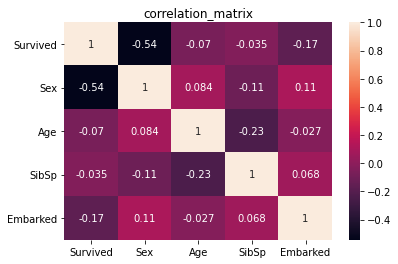

In [61]:
corr_mat=titanic.corr()
plt.figure()
sns.heatmap(corr_mat,annot=True)
plt.title('correlation_matrix')
plt.show()

In [62]:
type(corr_mat)

pandas.core.frame.DataFrame

In [63]:
corr_matrix=titanic.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
SibSp      -0.035322
Age        -0.069809
Embarked   -0.167675
Sex        -0.543351
Name: Survived, dtype: float64

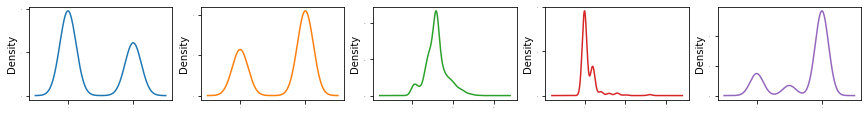

In [64]:
titanic.plot(kind='density',subplots=True,layout=(6,6),sharex=False,legend=False, fontsize=1,figsize=(18,12))
plt.show()

In [65]:
x=titanic.drop("Survived",axis=1)
y=titanic["Survived"]

In [66]:
x.skew().sort_values(ascending=False)

SibSp       3.695352
Age         0.434488
Sex        -0.618921
Embarked   -1.264823
dtype: float64

In [67]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [68]:
type(x_new)

numpy.ndarray

In [69]:
x=pd.DataFrame(x_new,columns=x.columns)

In [70]:
x

,Sex,Age,SibSp,Embarked
0,0.737695,-0.556267,1.373636,0.610411
1,-1.355574,0.657269,1.373636,-1.780520
2,-1.355574,-0.241577,-0.679850,0.610411
3,-1.355574,0.437923,1.373636,0.610411
4,0.737695,0.437923,-0.679850,0.610411
...,...,...,...,...
886,0.737695,-0.164262,-0.679850,0.610411
887,-1.355574,-0.798775,-0.679850,0.610411
888,-1.355574,0.042001,1.373636,0.610411
889,0.737695,-0.241577,-0.679850,-1.780520


In [71]:
x.skew().sort_values(ascending=False)

SibSp       0.808608
Age         0.064420
Sex        -0.618921
Embarked   -1.064527
dtype: float64

In [72]:
sk=x.skew()

In [73]:
sk[np.abs(sk)>0.25].all()

True

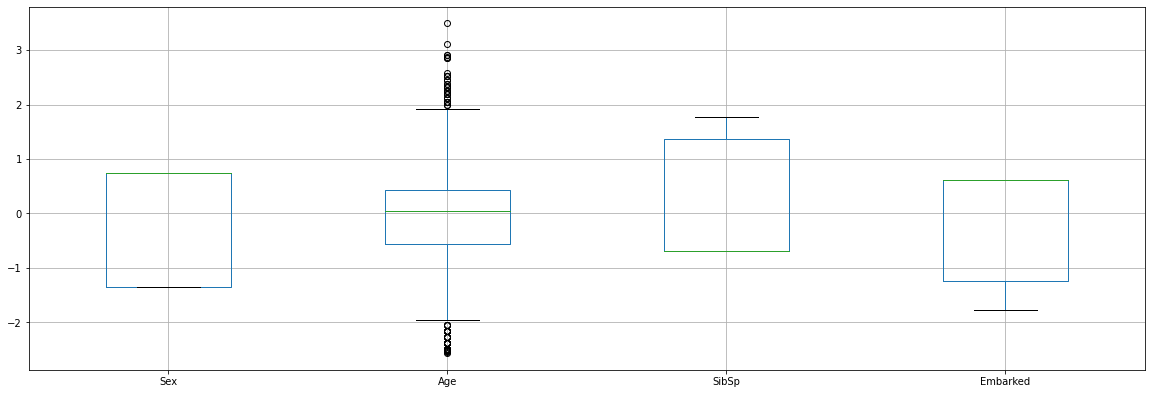

In [74]:
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [75]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

False

## There are not many outliers in the range (-3,3) thus not removing any values

In [76]:
x

,Sex,Age,SibSp,Embarked
0,0.737695,-0.556267,1.373636,0.610411
1,-1.355574,0.657269,1.373636,-1.780520
2,-1.355574,-0.241577,-0.679850,0.610411
3,-1.355574,0.437923,1.373636,0.610411
4,0.737695,0.437923,-0.679850,0.610411
...,...,...,...,...
886,0.737695,-0.164262,-0.679850,0.610411
887,-1.355574,-0.798775,-0.679850,0.610411
888,-1.355574,0.042001,1.373636,0.610411
889,0.737695,-0.241577,-0.679850,-1.780520


In [77]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [84]:
maxAcc=0
maxRS=0

for i in range(1,900):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is",maxAcc,"on Random state",maxRS)

Best accuracy is 0.8715083798882681 on Random state 56


In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=56)

In [86]:
x_train

,Sex,Age,SibSp,Embarked
226,0.737695,-0.798775,-0.679850,0.610411
278,0.737695,-1.853922,1.749364,-1.236339
31,-1.355574,0.042001,1.373636,-1.780520
449,0.737695,1.644629,-0.679850,0.610411
632,0.737695,0.215254,-0.679850,-1.780520
...,...,...,...,...
418,0.737695,0.064787,-0.679850,0.610411
192,-1.355574,-0.798775,1.373636,0.610411
399,-1.355574,-0.087442,-0.679850,0.610411
484,0.737695,-0.319411,1.373636,-1.780520


In [87]:
y_train

226    1
278    0
31     1
449    1
632    1
      ..
418    0
192    1
399    1
484    1
853    1
Name: Survived, Length: 712, dtype: int64

In [88]:
x_test

,Sex,Age,SibSp,Embarked
665,0.737695,0.215254,1.642413,0.610411
336,0.737695,-0.011099,1.373636,0.610411
524,0.737695,0.042001,-0.679850,-1.780520
635,-1.355574,-0.087442,-0.679850,0.610411
452,0.737695,0.064787,-0.679850,-1.780520
...,...,...,...,...
621,0.737695,0.945070,1.373636,0.610411
240,-1.355574,0.042001,1.373636,-1.780520
27,0.737695,-0.798775,1.718889,0.610411
686,0.737695,-1.218469,1.749364,0.610411


In [89]:
y_test

665    0
336    0
524    0
635    1
452    0
      ..
621    1
240    0
27     0
686    0
513    1
Name: Survived, Length: 179, dtype: int64

In [90]:
x_train.shape

(712, 4)

In [91]:
y_train.shape

(712,)

In [92]:
x_test.shape

(179, 4)

In [93]:
y_test.shape

(179,)

## LOGISTIC REGRESSION

In [94]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predlr)*100)
print (confusion_matrix(y_test,predlr))
print (classification_report(y_test,predlr))

Accuracy 87.15083798882681
[[108   8]
 [ 15  48]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       116
           1       0.86      0.76      0.81        63

    accuracy                           0.87       179
   macro avg       0.87      0.85      0.86       179
weighted avg       0.87      0.87      0.87       179



In [95]:
from sklearn.tree import DecisionTreeClassifier 
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
preddt=DT.predict(x_test)
print ("Accuracy",accuracy_score(y_test, preddt)*100)
print (confusion_matrix(y_test,preddt))
print (classification_report(y_test,preddt))

Accuracy 78.77094972067039
[[100  16]
 [ 22  41]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       116
           1       0.72      0.65      0.68        63

    accuracy                           0.79       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.79      0.79       179



In [96]:
from sklearn.ensemble import RandomForestClassifier 
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
predrf=RF.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predrf)*100)
print (confusion_matrix(y_test,predrf))
print (classification_report(y_test,predrf))

Accuracy 77.6536312849162
[[98 18]
 [22 41]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       116
           1       0.69      0.65      0.67        63

    accuracy                           0.78       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.78      0.77       179



In [97]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsv=svc.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predsv)*100)
print (confusion_matrix(y_test,predsv))
print (classification_report(y_test,predsv))

Accuracy 89.3854748603352
[[109   7]
 [ 12  51]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       116
           1       0.88      0.81      0.84        63

    accuracy                           0.89       179
   macro avg       0.89      0.87      0.88       179
weighted avg       0.89      0.89      0.89       179



## CROSS VALIDATION

In [98]:
from sklearn.model_selection import cross_val_score

scr1=cross_val_score(LR, x, y, cv=5)
print("Cross validation score of Logistic Regression Model is",scr1.mean())

Cross validation score of Logistic Regression Model is 0.7867365513778168


In [99]:
scr2=cross_val_score(RF, x, y, cv=5)
print("Cross validation score of Random Forest Classifier is",scr2.mean())

Cross validation score of Random Forest Classifier is 0.7687904086372482


In [100]:
scr3=cross_val_score(DT, x, y, cv=5)
print("Cross validation score of Decision Tree Classifier is",scr3.mean())

Cross validation score of Decision Tree Classifier is 0.7586906032264139


In [101]:
scr4=cross_val_score(svc, x, y, cv=5)
print("Cross validation score of Support Vector Classifier is",scr4.mean())

Cross validation score of Support Vector Classifier is 0.7979662293641328


### we see that the best accuracy is given by Support Vector Classifier

## Hyper Parameter Testing

In [102]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['sqrt','auto','log2'],
           'max_depth':range(1,50,3),
           'criterion':['gini','entropy']}

In [103]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt'}

In [116]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.88268156424581

In [105]:
from sklearn.model_selection import RandomizedSearchCV

grid_param={'min_samples_leaf':range(1,50,3),
            'min_samples_split':range(2,50,3),
           'max_depth':range(1,50,3),
           'criterion':['gini','entropy'],
           'splitter':['best','random']}

In [106]:
RCV=GridSearchCV(DecisionTreeClassifier(),grid_param,cv=5,scoring='accuracy')
RCV.fit(x_train,y_train)
RCV.best_params_

{'criterion': 'entropy',
 'max_depth': 19,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'splitter': 'random'}

In [107]:
RCV_pred=RCV.best_estimator_.predict(x_test)
accuracy_score(y_test,RCV_pred)

0.8659217877094972

In [112]:
VC=GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
VC.fit(x_train,y_train)
VC.best_params_

{'C': 10, 'kernel': 'rbf'}

In [114]:
VC_pred=VC.best_estimator_.predict(x_test)
accuracy_score(y_test,VC_pred)

0.8770949720670391

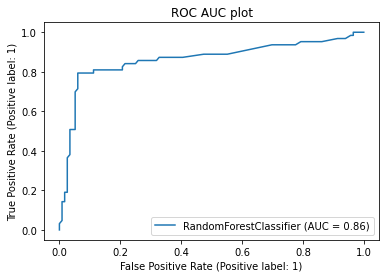

In [121]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

### Final accuracy is 89.38% and AUC accuracy is 86% using the Random Forest Classifier

In [122]:
import joblib
joblib.dump(GCV.best_estimator_,"Titanic_survival.pkl")

['Titanic_survival.pkl']